<a href="https://colab.research.google.com/github/annabocharovaua/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/Holt%60s_Linear_Trend_Model_Amadeus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [5]:
import pandas as pd 
import numpy as np

In [6]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True, delimiter=';')

In [7]:
df.head()

,Passengers
Month,
2011-01-01,112000
2011-02-01,118000
2011-03-01,132000
2011-04-01,129000
2011-05-01,121000


<Axes: xlabel='Month'>

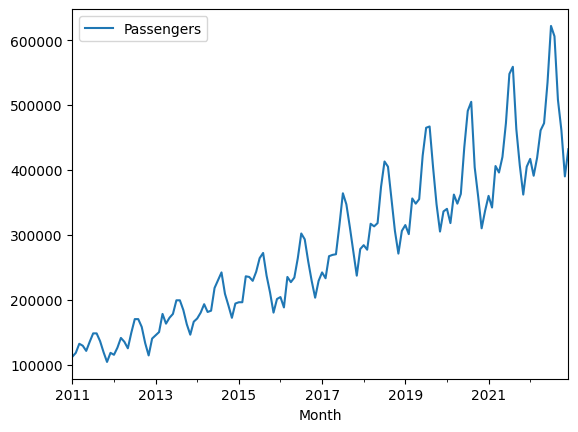

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.holtwinters import Holt

In [10]:
holt = Holt(
    df['Passengers'],
    initialization_method='legacy-heuristic' )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
res_h = holt.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [12]:
df['Holt'] = res_h.fittedvalues

<Axes: xlabel='Month'>

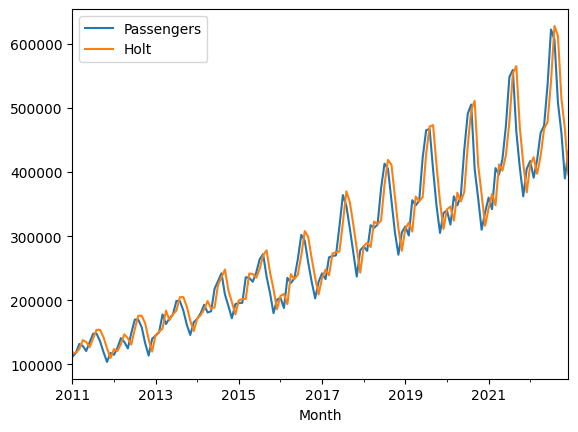

In [13]:
df[['Passengers','Holt']].plot()

In [14]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [15]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [16]:
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [17]:
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)

<Axes: xlabel='Month'>

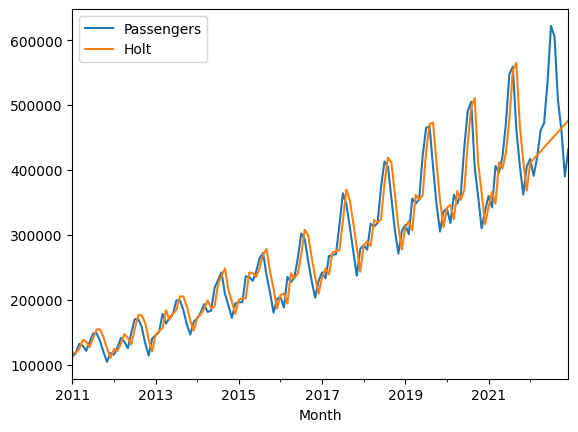

In [18]:
df[['Passengers','Holt']].plot()

In [20]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse
     

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

holt_forecast = df.loc[test_idx, 'Holt']


holt_rmse = root_mean_squared_error(test['Passengers'], holt_forecast)
holt_mse = mean_squared_error(test['Passengers'], holt_forecast)
holt_mae = mean_absolute_error(test['Passengers'], holt_forecast)
holt_r2 = r2_score(test['Passengers'], holt_forecast)

print("Holt`s Linear Trend Model Metrics:")
print("RMSE:", holt_rmse)
print("MSE:", holt_mse)
print("MAE:", holt_mae)
print("R^2:", holt_r2)

Holt`s Linear Trend Model Metrics:
RMSE: 80291.89469170087
MSE: 6446788353.183183
MAE: 58872.263587353715
R^2: -0.16379107874594245
